# Taller 3

In [517]:
import zipfile
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing import image
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings("ignore")

In [346]:
DIR_MAIN  = 'C:/Users/sunhh/OneDrive - Caja de Compensacion Familiar de Antioquia COMFAMA/Documentos/EAFIT/tiny-imagenet-200/'
DIR_TRAIN = DIR_MAIN + 'train/'
DIR_VAL   = DIR_MAIN + 'val/'
DIR_TEST  = DIR_MAIN + 'test/'

In [347]:
labels = os.listdir(DIR_TRAIN)

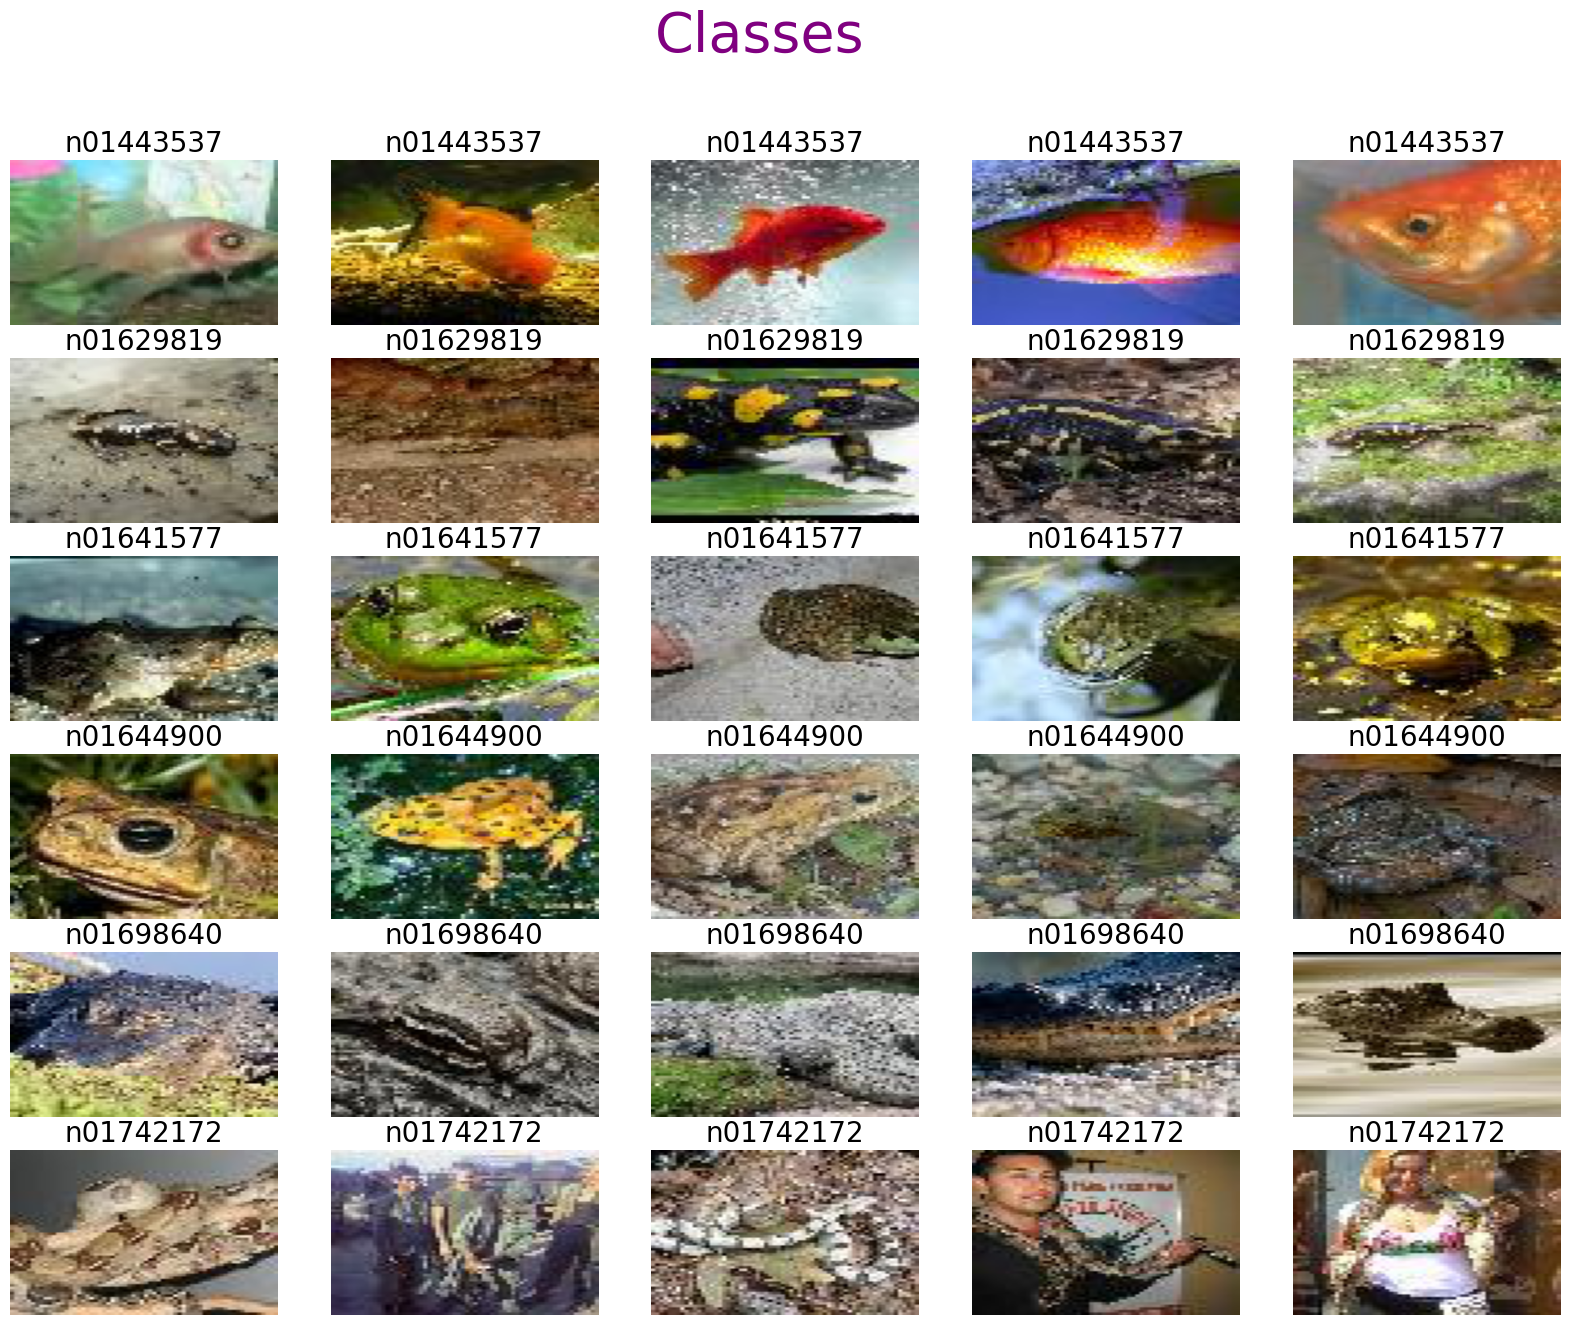

In [348]:
fig, ax = plt.subplots(6, 5, figsize=(20, 15))
fig.suptitle('Classes', color='purple', fontsize=40)

# Itera a través de las primeras 6 clases
for i, class_name in enumerate(labels[:6]):
    im_src = os.path.join(DIR_TRAIN, class_name, 'images')
    file_names = os.listdir(im_src)

    # Itera a través de las primeras 5 imágenes de cada clase
    for j, file_name in enumerate(file_names[:5]):
        im_src_file = os.path.join(im_src, file_name)
        image = plt.imread(im_src_file)
        ax[i, j].axis("off")
        ax[i, j].imshow(image, aspect='auto')
        ax[i, j].set_title(class_name, fontsize=20)

plt.show()

In [349]:
label_encoder = LabelEncoder()
label_encoder.fit(labels)

LabelEncoder()

In [412]:
# Train
data = {'path': [], 'label': []}
for label in labels:
    for filename in os.listdir(DIR_TRAIN + label + '/images/'):
        data['path'].append(DIR_TRAIN + label + '/images/' + filename)
        data['label'].append(label)

df_train = pd.DataFrame(data)
df_train['label_n'] = label_encoder.transform(df_train['label'])
df_train.head(5)

,path,label,label_n
0,C:/Users/sunhh/OneDrive - Caja de Compensacion Familiar de Antioquia COMFAMA/Documentos/EAFIT/tiny-imagenet-200/train/n01443537/images/n01443537_0.JPEG,n01443537,0
1,C:/Users/sunhh/OneDrive - Caja de Compensacion Familiar de Antioquia COMFAMA/Documentos/EAFIT/tiny-imagenet-200/train/n01443537/images/n01443537_1.JPEG,n01443537,0
2,C:/Users/sunhh/OneDrive - Caja de Compensacion Familiar de Antioquia COMFAMA/Documentos/EAFIT/tiny-imagenet-200/train/n01443537/images/n01443537_10.JPEG,n01443537,0
3,C:/Users/sunhh/OneDrive - Caja de Compensacion Familiar de Antioquia COMFAMA/Documentos/EAFIT/tiny-imagenet-200/train/n01443537/images/n01443537_100.JPEG,n01443537,0
4,C:/Users/sunhh/OneDrive - Caja de Compensacion Familiar de Antioquia COMFAMA/Documentos/EAFIT/tiny-imagenet-200/train/n01443537/images/n01443537_101.JPEG,n01443537,0


In [351]:
# Val
files_val = []
labels_val = []
for filename in os.listdir(DIR_VAL + 'images/'):
    files_val.append(DIR_VAL + 'images/' + filename)

val_df = pd.read_csv(DIR_VAL + 'val_annotations.txt', sep='\t', names=["File", "Label", "X1", "Y1", "X2", "Y2"], usecols=["File", "Label"])
for f in files_val:
    l = val_df.loc[val_df['File'] == f[len(DIR_VAL + 'images/'):]]['Label'].values[0]
    labels_val.append(l)

# Crear DataFrame para el conjunto de validación
data_val = {'path': files_val, 'label': labels_val}
df_val = pd.DataFrame(data_val)
df_val['label_n'] = label_encoder.transform(df_val['label'])
df_val.head(5)

,path,label,label_n
0,C:/Users/sunhh/OneDrive - Caja de Compensacion Familiar de Antioquia COMFAMA/Documentos/EAFIT/tiny-imagenet-200/val/images/val_0.JPEG,n03444034,107
1,C:/Users/sunhh/OneDrive - Caja de Compensacion Familiar de Antioquia COMFAMA/Documentos/EAFIT/tiny-imagenet-200/val/images/val_1.JPEG,n04067472,139
2,C:/Users/sunhh/OneDrive - Caja de Compensacion Familiar de Antioquia COMFAMA/Documentos/EAFIT/tiny-imagenet-200/val/images/val_10.JPEG,n04371430,158
3,C:/Users/sunhh/OneDrive - Caja de Compensacion Familiar de Antioquia COMFAMA/Documentos/EAFIT/tiny-imagenet-200/val/images/val_100.JPEG,n03026506,90
4,C:/Users/sunhh/OneDrive - Caja de Compensacion Familiar de Antioquia COMFAMA/Documentos/EAFIT/tiny-imagenet-200/val/images/val_1000.JPEG,n04023962,138


In [352]:
#Probando que en efecto sean los mismos códigos
df_train[df_train['label'] == 'n03026506'].head(1)

,path,label,label_n
45000,C:/Users/sunhh/OneDrive - Caja de Compensacion Familiar de Antioquia COMFAMA/Documentos/EAFIT/tiny-imagenet-200/train/n03026506/images/n03026506_0.JPEG,n03026506,90


In [353]:
# Test
files_test = []
for filename in os.listdir(DIR_TEST + 'images/'):
    files_test.append(DIR_TEST + 'images/' + filename)
files_test = sorted(files_test)

# Crear DataFrame para el conjunto de pruebas
data_test = {'path': files_test}
df_test = pd.DataFrame(data_test)
df_test.head(5)

,path
0,C:/Users/sunhh/OneDrive - Caja de Compensacion Familiar de Antioquia COMFAMA/Documentos/EAFIT/tiny-imagenet-200/test/images/test_0.JPEG
1,C:/Users/sunhh/OneDrive - Caja de Compensacion Familiar de Antioquia COMFAMA/Documentos/EAFIT/tiny-imagenet-200/test/images/test_1.JPEG
2,C:/Users/sunhh/OneDrive - Caja de Compensacion Familiar de Antioquia COMFAMA/Documentos/EAFIT/tiny-imagenet-200/test/images/test_10.JPEG
3,C:/Users/sunhh/OneDrive - Caja de Compensacion Familiar de Antioquia COMFAMA/Documentos/EAFIT/tiny-imagenet-200/test/images/test_100.JPEG
4,C:/Users/sunhh/OneDrive - Caja de Compensacion Familiar de Antioquia COMFAMA/Documentos/EAFIT/tiny-imagenet-200/test/images/test_1000.JPEG


# 1. Crear un DataGenerator personalizado para el conjunto de datos

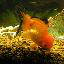

In [427]:
from PIL import Image

# Probando
img = Image.open(df_train.loc[1, 'path'])
img

In [429]:
#img = img.resize((64, 64))
img_array = np.array(img)
image_shape = img_array.shape
image_shape

(64, 64, 3)

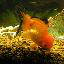

In [526]:
# Probando
img = image.load_img(df_train.loc[1,'path'], target_size=(64, 64))
img

In [527]:
class DataGenerator(Sequence):
    'Generates data for Keras'
    def __init__(self, df, batch_size = 64, dim=(64,64), n_channels=3,
                 n_classes=200, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.df = df
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.df) / self.batch_size))

    def __getitem__(self, idx):
        'Generate one batch of data'
        # Generate indexes of the batch
        batch_indices = self.indexes[idx * self.batch_size:(idx + 1) * self.batch_size]

        # Find list of IDs
        df_batch = self.df.iloc[batch_indices,:]
        df_batch = df_batch.reset_index()
        # Generate data
        X, y = self.__data_generation(df_batch)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.df))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, df_batch):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i in range(len(df_batch)):
            img = image.load_img(df_batch.loc[i,'path'], target_size=self.dim)
            X[i] = image.img_to_array(img)
            y[i] = df_batch.loc[i,'label_n']

        return X, y

class DataGenerator(Sequence):
    'Generates data for Keras'
    def __init__(self, df, batch_size = 64, dim=(64,64), n_channels=3,
                 n_classes=200, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.df = df
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.df) / self.batch_size))

    def __getitem__(self, idx):
        'Generate one batch of data'
        # Generate indexes of the batch
        batch_indices = self.indexes[idx * self.batch_size:(idx + 1) * self.batch_size]

        # Find list of IDs
        df_batch = self.df.iloc[batch_indices,:]
        df_batch = df_batch.reset_index()
        # Generate data
        X, y = self.__data_generation(df_batch)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.df))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, df_batch):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i in range(len(df_batch)):
            img = Image.open(df_batch.loc[i, 'path'])
            img = img.resize(self.dim, Image.ANTIALIAS)
            img_array = np.array(img)
            if len(img_array.shape) == 2:
                img_array = np.stack((img_array,) * 3, axis=-1)
            X[i] = img_array
            y[i] = df_batch.loc[i, 'label_n']
    
        return X, y

In [528]:
batch_size = 64
image_size = (64, 64)
num_channels = 3

train_data_gen = DataGenerator(df = df_train, batch_size = batch_size, dim = image_size, n_channels = num_channels)
val_data_gen   = DataGenerator(df = df_val, batch_size = batch_size, dim = image_size, n_channels = num_channels)

# 2. Crear un modelo básico de red neuronal (utilizando dropout y batcnorm para regularizar)

def ClassModel(input_shape, num_classes):
    model = models.Sequential([
        layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),  
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),  # You can adjust the dropout rate as needed
        layers.Dense(num_classes)
    ])
    
    return model


In [529]:
def ClassModel(input_shape, num_classes):
    model = keras.Sequential([
        layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    return model

In [530]:
input_shape = (64, 64, 3)
num_classes = 200
model = ClassModel(input_shape, num_classes)

In [531]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [532]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_24 (Rescaling)    (None, 64, 64, 3)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_28 (Flatten)        (None, 12544)           

# 3. Entrenar el modelo y mostrar el rendimiento en los conjuntos de entrenamiento, validación y prueba

In [533]:
history = model.fit(train_data_gen,
                    epochs = 20,  
                    validation_data= val_data_gen)  

Epoch 1/20
1562/1562 [==============================] - 438s 279ms/step - loss: 5.0063 - accuracy: 0.0299 - val_loss: 4.7454 - val_accuracy: 0.0488
Epoch 2/20
1562/1562 [==============================] - 404s 258ms/step - loss: 4.4651 - accuracy: 0.0700 - val_loss: 4.2664 - val_accuracy: 0.1058
Epoch 3/20
1562/1562 [==============================] - 374s 239ms/step - loss: 4.2667 - accuracy: 0.0926 - val_loss: 3.9537 - val_accuracy: 0.1390
Epoch 4/20
1562/1562 [==============================] - 351s 224ms/step - loss: 4.1614 - accuracy: 0.1062 - val_loss: 4.0362 - val_accuracy: 0.1258
Epoch 5/20
1562/1562 [==============================] - 356s 228ms/step - loss: 4.0943 - accuracy: 0.1119 - val_loss: 3.8935 - val_accuracy: 0.1516
Epoch 6/20
1562/1562 [==============================] - 358s 229ms/step - loss: 4.0378 - accuracy: 0.1199 - val_loss: 3.8817 - val_accuracy: 0.1468
Epoch 7/20
1562/1562 [==============================] - 359s 230ms/step - loss: 3.9924 - accuracy: 0.1235 - val_

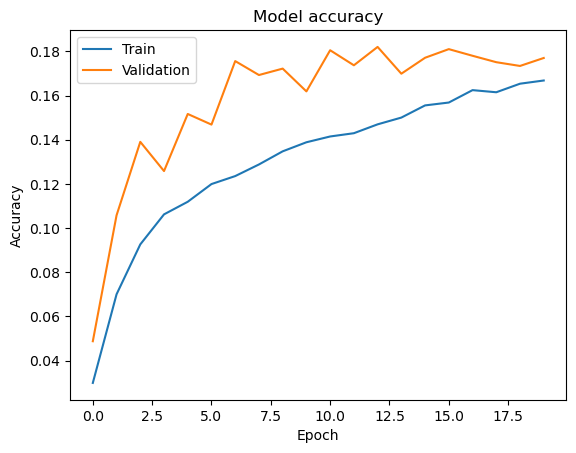

In [534]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

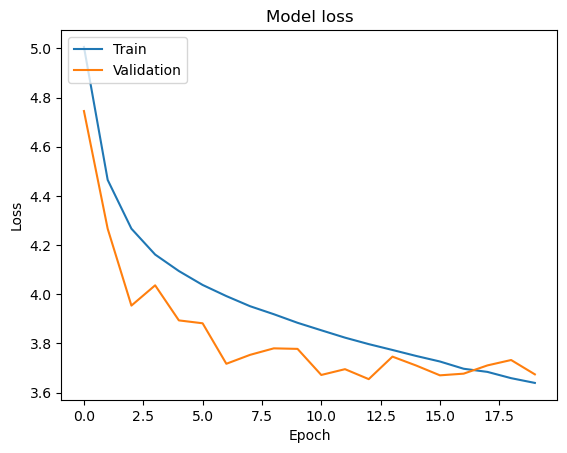

In [535]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()  

# 4. Descargar un modelo pre-entrenado, el que prefieran, y hacer transfer learning para mejorar la clasificación del modelo base.

MobileNetV2

In [541]:
from tensorflow.keras.applications import MobileNetV2

In [548]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
output = layers.Dense(200, activation='softmax')(x)
model_pre = tf.keras.Model(inputs=base_model.input, outputs=output)

In [545]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Capa de aplanamiento
x = layers.Flatten()(base_model.output)

# Capa densa con el número correcto de neuronas (reemplaza 1024 por tu número de clases)
x = layers.Dense(200, activation='relu')(x)

# Capa de salida
output = layers.Dense(200, activation='softmax')(x)

# Modelo con capa personalizada
model_pre = tf.keras.Model(inputs=base_model.input, outputs=output)

In [549]:
model_pre.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])                                                        

In [550]:
model_pre.summary() 

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 32, 32, 32)           864       ['input_12[0][0]']            
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 32, 32, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 32, 32, 32)           0         ['bn_Conv1[0][0]']      

In [555]:
history2 = model_pre.fit(train_data_gen,
                         epochs = 10,  
                         validation_data= val_data_gen)

Epoch 1/10
1562/1562 [==============================] - 1040s 666ms/step - loss: 2.5383 - accuracy: 0.3834 - val_loss: 3.7741 - val_accuracy: 0.2628
Epoch 2/10
1562/1562 [==============================] - 1021s 653ms/step - loss: 2.4046 - accuracy: 0.4079 - val_loss: 3.4320 - val_accuracy: 0.2996
Epoch 3/10
1562/1562 [==============================] - 990s 634ms/step - loss: 2.4653 - accuracy: 0.3983 - val_loss: 5.5490 - val_accuracy: 0.1114
Epoch 4/10
1562/1562 [==============================] - 1081s 692ms/step - loss: 2.4328 - accuracy: 0.4048 - val_loss: 3.6646 - val_accuracy: 0.2730
Epoch 5/10
1562/1562 [==============================] - 982s 629ms/step - loss: 2.4155 - accuracy: 0.4076 - val_loss: 5.6854 - val_accuracy: 0.1115
Epoch 6/10
1562/1562 [==============================] - 1047s 670ms/step - loss: 2.4705 - accuracy: 0.3974 - val_loss: 4.0596 - val_accuracy: 0.2160
Epoch 7/10
1562/1562 [==============================] - 1125s 720ms/step - loss: 2.3668 - accuracy: 0.4186 -

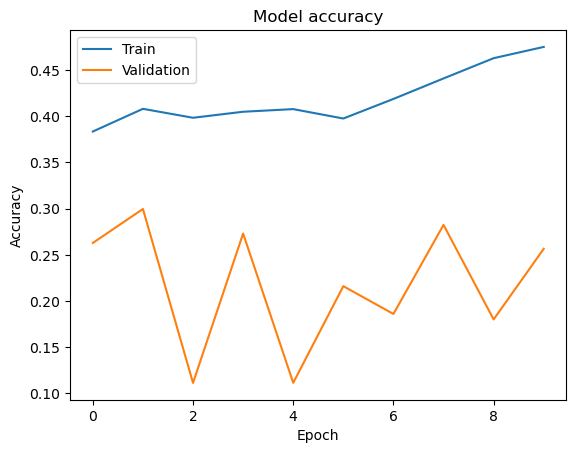

In [556]:
# Plot training & validation accuracy values
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

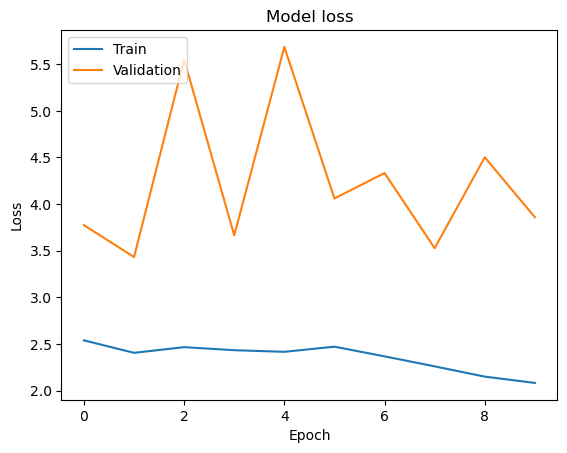

In [557]:
# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()  